Feature: 0, Score: 0.25141
Feature: 1, Score: 0.00660
0.9744172467588832
0.025582753241116724


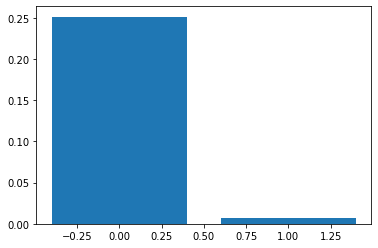

In [27]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
acc = 0
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    acc += abs(v)
for i,v in enumerate(importance):
   print(abs(v)/acc)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [28]:
import pandas as pd
import numpy as np
df_origianl = pd.DataFrame(X)
df_origianl[2]  = y
df_origianl.columns = ['x1','x2','y']
subset = df_origianl.sample(frac=0.1,replace=False,random_state=43)
df_origianl = df_origianl.append(subset)
df_origianl = df_origianl.drop_duplicates(subset=['x1','x2','y'],keep=False)
df_origianl


,x1,x2,y
0,0.863411,-0.912354,1
1,-0.530997,0.901182,0
2,0.982776,-1.591112,0
3,-1.032039,-0.801162,0
4,3.620555,-0.098876,1
...,...,...,...
994,2.282176,0.273183,1
996,1.425043,-0.236500,1
997,1.330195,3.721810,1
998,-1.010841,0.426339,0


In [29]:
error_a = []
error_b = []
for i in range(21) :
    error_a.append(i)
    error_b.append(20-i)

print(error_b,error_a)
print(subset,type(subset))

[20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
           x1        x2  y
858 -3.613129  0.089027  0
986  1.967106 -0.762527  1
183 -0.778719  0.015330  0
502  1.147572  3.711029  1
710  1.042689  1.293286  1
..        ...       ... ..
518  1.367170 -1.444893  1
941 -2.227633 -0.393626  0
984 -0.962597  0.390823  1
627  1.438896 -0.237638  1
270 -0.056790  0.839988  0

[100 rows x 3 columns] <class 'pandas.core.frame.DataFrame'>


In [30]:
subset_x = subset.iloc[:, :-1].values
subset_y = subset.iloc[:,-1].values
subset_x = list(subset_x)
subset_y = list(subset_y)

In [31]:
pd.set_option('display.max_rows',10)
for i in range(21) :
    '''
    temp = df_origianl.copy()
    df_2feature_be = pd.DataFrame.to_numpy(df_origianl)
    e1 = temp['x1'].mean()*0.3*0.974
    e2 = temp['x2'].mean()*0.3*0.0255

    for idx,cell in temp['x1'].iteritems():
        temp['x1'][idx] += e1
    temp = temp.to_numpy()
    df_2feature_be = np.vstack((df_2feature_be,temp))
    temp = df_origianl.copy()

    for idx,cell in temp['x1'].iteritems():
        temp['x1'][idx] = temp['x1'][idx] - e1
    temp = temp.to_numpy()
    df_2feature_be = np.vstack((df_2feature_be,temp))
    temp = df_origianl.copy()

    for idx,cell in temp['x2'].iteritems():
        temp['x2'][idx] += e2
    temp = temp.to_numpy()
    df_2feature_be = np.vstack((df_2feature_be,temp))
    temp = df_origianl.copy()

    for idx,cell in temp['x2'].iteritems():
        temp['x2'][idx] = temp['x2'][idx] - e2
    temp = temp.to_numpy()
    df_2feature_be = np.vstack((df_2feature_be,temp))
    temp = df_origianl.copy()

    df_2feature_be = pd.DataFrame(df_2feature_be)
    df_2feature_be
    '''
    temp = df_origianl.copy()
    df_2feature_be = pd.DataFrame.to_numpy(df_origianl)
    #print(df_2feature_be.shape)
    e1 = temp['x1'].mean()*0.2*(error_a[i]/(error_a[i]+error_b[i]))
    e2 = temp['x2'].mean()*0.2*(error_b[i]/(error_a[i]+error_b[i]))

    for idx,cell in temp['x1'].iteritems():
        temp['x1'][idx] += e1
    temp = temp.to_numpy()
    df_2feature_be = np.vstack((df_2feature_be,temp))
    #print(df_2feature_be.shape)
    temp = df_origianl.copy()

    for idx,cell in temp['x1'].iteritems():
        temp['x1'][idx] = temp['x1'][idx] - e1
    temp = temp.to_numpy()
    df_2feature_be = np.vstack((df_2feature_be,temp))
    #print(df_2feature_be.shape)
    temp = df_origianl.copy()

    for idx,cell in temp['x2'].iteritems():
        temp['x2'][idx] += e2
    temp = temp.to_numpy()
    df_2feature_be = np.vstack((df_2feature_be,temp))
    #print(df_2feature_be.shape)
    temp = df_origianl.copy()

    for idx,cell in temp['x2'].iteritems():
        temp['x2'][idx] = temp['x2'][idx] - e2
    temp = temp.to_numpy()
    df_2feature_be = np.vstack((df_2feature_be,temp))
    #print(df_2feature_be.shape)
    temp = df_origianl.copy()

    df_2feature_be = pd.DataFrame(df_2feature_be)
    #print(df_2feature_be)

    x_be = df_2feature_be.iloc[:, :-1].values
    y_be = df_2feature_be.iloc[:,-1].values
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)
    y_subset_predict = clf_BE.predict(subset_x)
    subset_raw = clf_BE.score(subset_x, subset_y)
    print('BESVM Accuracy (on training) = with x1 bounded error (20%*'+str((error_a[i]/(error_a[i]+error_b[i])))+'),x2 with error (20%*'+str((error_b[i]/(error_a[i]+error_b[i])))+') : '+str(result_BE_train))
    print('BESVM Accuracy (on testing) = with x1 bounded error (20%*'+str((error_a[i]/(error_a[i]+error_b[i])))+'),x2 with error (20%*'+str((error_b[i]/(error_a[i]+error_b[i])))+') : '+str(result_BE_test))
    print('BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error '+str(subset_raw))



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.0),x2 with error (20%*1.0) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.0),x2 with error (20%*1.0) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.05),x2 with error (20%*0.95) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.05),x2 with error (20%*0.95) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.1),x2 with error (20%*0.9) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.1),x2 with error (20%*0.9) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.15),x2 with error (20%*0.85) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.15),x2 with error (20%*0.85) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.2),x2 with error (20%*0.8) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.2),x2 with error (20%*0.8) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.25),x2 with error (20%*0.75) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.25),x2 with error (20%*0.75) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.3),x2 with error (20%*0.7) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.3),x2 with error (20%*0.7) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.35),x2 with error (20%*0.65) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.35),x2 with error (20%*0.65) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.4),x2 with error (20%*0.6) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.4),x2 with error (20%*0.6) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.45),x2 with error (20%*0.55) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.45),x2 with error (20%*0.55) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.5),x2 with error (20%*0.5) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.5),x2 with error (20%*0.5) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.55),x2 with error (20%*0.45) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.55),x2 with error (20%*0.45) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.6),x2 with error (20%*0.4) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.6),x2 with error (20%*0.4) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.65),x2 with error (20%*0.35) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.65),x2 with error (20%*0.35) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.7),x2 with error (20%*0.3) : 0.8494444444444444
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.7),x2 with error (20%*0.3) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.75),x2 with error (20%*0.25) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.75),x2 with error (20%*0.25) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.8),x2 with error (20%*0.2) : 0.8494444444444444
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.8),x2 with error (20%*0.2) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.85),x2 with error (20%*0.15) : 0.8494444444444444
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.85),x2 with error (20%*0.15) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.9),x2 with error (20%*0.1) : 0.8494444444444444
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.9),x2 with error (20%*0.1) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*0.95),x2 with error (20%*0.05) : 0.8502777777777778
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.95),x2 with error (20%*0.05) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

BESVM Accuracy (on training) = with x1 bounded error (20%*1.0),x2 with error (20%*0.0) : 0.8502777777777778
BESVM Accuracy (on testing) = with x1 bounded error (20%*1.0),x2 with error (20%*0.0) : 0.8533333333333334
BESVM Accuracy (on subset_raw) = with no bounded error,x2 with no error 0.88


Original Accuracy (on training) = 0.85
Original Accuracy (on testing) = 0.8388888888888889


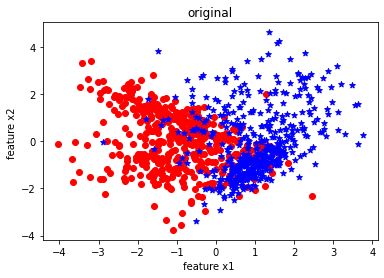

BESVM Accuracy (on training) = with x1 bounded error (20%*0.974),x2 with error (20%*0.0255) : 0.8502777777777778
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.974),x2 with error (20%*0.0255) : 0.8533333333333334


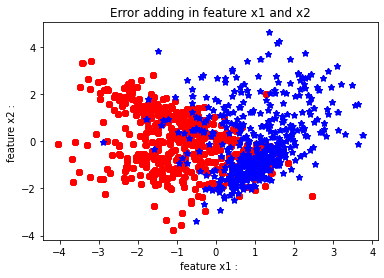

In [32]:
pd.set_option('display.max_rows',10)

x_original = df_origianl.iloc[:,:-1].values
y_original = df_origianl.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (20%*0.974),x2 with error (20%*0.0255) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (20%*0.974),x2 with error (20%*0.0255) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()


In [33]:
pd.set_option('display.max_rows',10)
temp = df_origianl.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_origianl)
e1 = temp['x1'].mean()*0.3*0.0255
e2 = temp['x2'].mean()*0.3*0.974

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,0.863411,-0.912354,1.0
1,-0.530997,0.901182,0.0
2,0.982776,-1.591112,0.0
3,-1.032039,-0.801162,0.0
4,3.620555,-0.098876,1.0
...,...,...,...
4495,2.282176,0.271044,1.0
4496,1.425043,-0.238640,1.0
4497,1.330195,3.719670,1.0
4498,-1.010841,0.424200,0.0


Original Accuracy (on training) = 0.85
Original Accuracy (on testing) = 0.8388888888888889


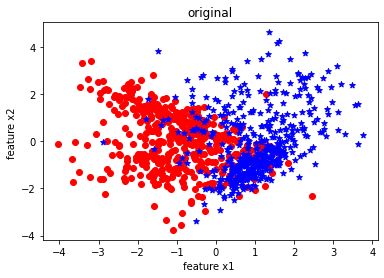

BESVM Accuracy (on training) = with x1 bounded error (20%*0.025),x2 with error (20%*0.974) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (20%*0.025),x2 with error (20%*0.974) : 0.8533333333333334


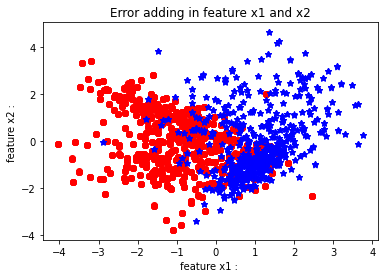

In [34]:
pd.set_option('display.max_rows',10)

x_original = df_origianl.iloc[:,:-1].values
y_original = df_origianl.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (20%*0.025),x2 with error (20%*0.974) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (20%*0.025),x2 with error (20%*0.974) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()


Decision Tree importance

In [35]:
from sklearn.datasets import make_classification  
from sklearn.tree import DecisionTreeClassifier  
from matplotlib import pyplot  

In [36]:
X

array([[ 0.86341137, -0.91235445],
       [-0.53099717,  0.90118241],
       [ 0.98277596, -1.59111159],
       ...,
       [ 1.33019532,  3.72180951],
       [-1.01084076,  0.42633933],
       [-1.00873243,  1.24540194]])

Feature: 0, Score: 0.75792
Feature: 1, Score: 0.24208
0.7579222766911797
0.24207772330882035


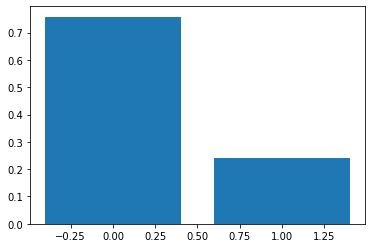

In [37]:
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
acc = 0
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    acc += abs(v)
for i,v in enumerate(importance):
   print(abs(v)/acc)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [38]:
pd.set_option('display.max_rows',10)
temp = df_origianl.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_origianl)
e1 = temp['x1'].mean()*0.3*0.75
e2 = temp['x2'].mean()*0.3*0.249

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,0.863411,-0.912354,1.0
1,-0.530997,0.901182,0.0
2,0.982776,-1.591112,0.0
3,-1.032039,-0.801162,0.0
4,3.620555,-0.098876,1.0
...,...,...,...
4495,2.282176,0.272636,1.0
4496,1.425043,-0.237047,1.0
4497,1.330195,3.721263,1.0
4498,-1.010841,0.425792,0.0


Original Accuracy (on training) = 0.85
Original Accuracy (on testing) = 0.8388888888888889


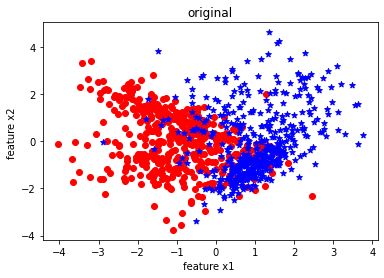

BESVM Accuracy (on training) = with x1 bounded error (by decision tree 30%*0.75),x2 with error (by decision tree 30%*0.249) : 0.8502777777777778
BESVM Accuracy (on testing) = with x1 bounded error (by decision tree 30%*0.75),x2 with error (by decision tree 30%*0.249) : 0.8533333333333334


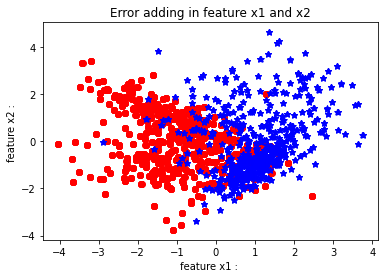

In [39]:
pd.set_option('display.max_rows',10)

x_original = df_origianl.iloc[:,:-1].values
y_original = df_origianl.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (by decision tree 30%*0.75),x2 with error (by decision tree 30%*0.249) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (by decision tree 30%*0.75),x2 with error (by decision tree 30%*0.249) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()


In [40]:
pd.set_option('display.max_rows',10)
temp = df_origianl.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_origianl)
e1 = temp['x1'].mean()*0.3*0.249
e2 = temp['x2'].mean()*0.3*0.75

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,0.863411,-0.912354,1.0
1,-0.530997,0.901182,0.0
2,0.982776,-1.591112,0.0
3,-1.032039,-0.801162,0.0
4,3.620555,-0.098876,1.0
...,...,...,...
4495,2.282176,0.271536,1.0
4496,1.425043,-0.238148,1.0
4497,1.330195,3.720162,1.0
4498,-1.010841,0.424692,0.0


Original Accuracy (on training) = 0.85
Original Accuracy (on testing) = 0.8388888888888889


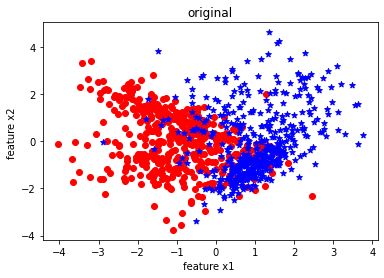

BESVM Accuracy (on training) = with x1 bounded error (30%*0.249),x2 with error (30%*0.75) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (by decision tree 30%*0.249),x2 with error (by decision tree 30%*0.75) : 0.8533333333333334


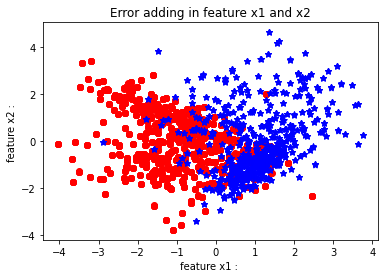

In [41]:
pd.set_option('display.max_rows',10)

x_original = df_origianl.iloc[:,:-1].values
y_original = df_origianl.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (30%*0.249),x2 with error (30%*0.75) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (by decision tree 30%*0.249),x2 with error (by decision tree 30%*0.75) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()


permutation importance

Feature: 0, Score: 0.38580
Feature: 1, Score: 0.06560
0.8546743464776251
0.1453256535223749


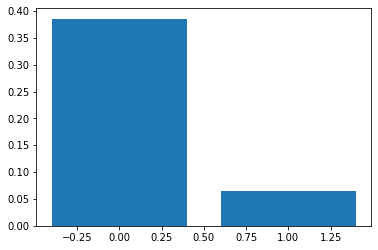

In [42]:
# permutation feature importance with knn for classification 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.inspection import permutation_importance  
# define dataset 
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)  
# define the model 
model = KNeighborsClassifier()  
# fit the model 
model.fit(X, y)  
# perform permutation importance 
results = permutation_importance(model, X, y, scoring='accuracy')  
# get importance 
importance = results.importances_mean  
# summarize feature importance 

acc = 0
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    acc += abs(v)
for i,v in enumerate(importance):
   print(abs(v)/acc)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [43]:
pd.set_option('display.max_rows',10)
temp = df_origianl.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_origianl)
e1 = temp['x1'].mean()*0.3*0.835
e2 = temp['x2'].mean()*0.3*0.164

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,0.863411,-0.912354,1.0
1,-0.530997,0.901182,0.0
2,0.982776,-1.591112,0.0
3,-1.032039,-0.801162,0.0
4,3.620555,-0.098876,1.0
...,...,...,...
4495,2.282176,0.272823,1.0
4496,1.425043,-0.236860,1.0
4497,1.330195,3.721449,1.0
4498,-1.010841,0.425979,0.0


Original Accuracy (on training) = 0.85
Original Accuracy (on testing) = 0.8388888888888889


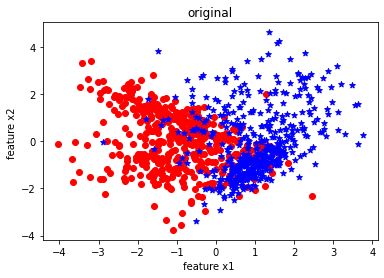

BESVM Accuracy (on training) = with x1 bounded error (by permutation 30%*0.835),x2 with error (by permutation 30%*0.164) : 0.8494444444444444
BESVM Accuracy (on testing) = with x1 bounded error (by permutation 30%*0.835),x2 with error (by permutation 30%*0.164) : 0.8533333333333334


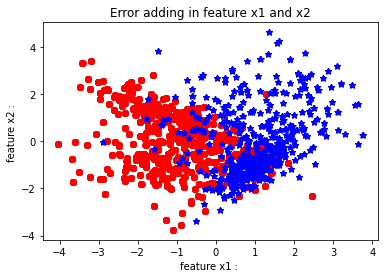

In [44]:
pd.set_option('display.max_rows',10)

x_original = df_origianl.iloc[:,:-1].values
y_original = df_origianl.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (by permutation 30%*0.835),x2 with error (by permutation 30%*0.164) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (by permutation 30%*0.835),x2 with error (by permutation 30%*0.164) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()


In [45]:
pd.set_option('display.max_rows',10)
temp = df_origianl.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_origianl)
e1 = temp['x1'].mean()*0.3*0.164
e2 = temp['x2'].mean()*0.3*0.835

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_origianl.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,0,1,2
0,0.863411,-0.912354,1.0
1,-0.530997,0.901182,0.0
2,0.982776,-1.591112,0.0
3,-1.032039,-0.801162,0.0
4,3.620555,-0.098876,1.0
...,...,...,...
4495,2.282176,0.271349,1.0
4496,1.425043,-0.238334,1.0
4497,1.330195,3.719975,1.0
4498,-1.010841,0.424505,0.0


Original Accuracy (on training) = 0.85
Original Accuracy (on testing) = 0.8388888888888889


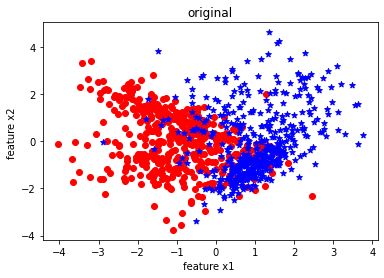

BESVM Accuracy (on training) = with x1 bounded error (by permutation 30%*0.164),x2 with error (by permutation 30%*0.835) : 0.8491666666666666
BESVM Accuracy (on testing) = with x1 bounded error (by permutation 30%*0.164),x2 with error (by permutation 30%*0.835) : 0.8533333333333334


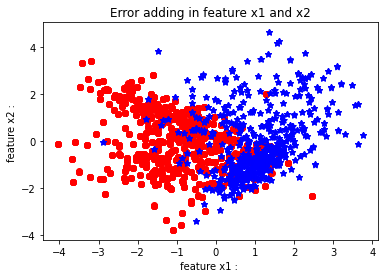

In [46]:
pd.set_option('display.max_rows',10)

x_original = df_origianl.iloc[:,:-1].values
y_original = df_origianl.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 ')
plt.ylabel('feature x2 ')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with x1 bounded error (by permutation 30%*0.164),x2 with error (by permutation 30%*0.835) : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with x1 bounded error (by permutation 30%*0.164),x2 with error (by permutation 30%*0.835) : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : ')
plt.ylabel('feature x2 : ')
plt.show()
